In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline

import os

In [2]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [404]:
# Importing dataset
df=pd.read_csv('C:/Users/mahesh/footprint-nfa-2019-edition/footprint-nfa-2019-edition/NFA 2019 public_data.csv')

C:\Users\mahesh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [405]:
df

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Armenia,1992,1,AreaPerCap,1.402924e-01,1.995463e-01,0.097188051,3.688847e-02,2.931995e-02,0.000000e+00,5.032351e-01,3A
1,Armenia,1992,1,AreaTotHA,4.830000e+05,6.870000e+05,334600,1.270000e+05,1.009430e+05,0.000000e+00,1.732543e+06,3A
2,Armenia,1992,1,BiocapPerCap,1.598044e-01,1.352610e-01,0.084003213,1.374213e-02,3.339780e-02,0.000000e+00,4.262086e-01,3A
3,Armenia,1992,1,BiocapTotGHA,5.501762e+05,4.656780e+05,289207.1078,4.731155e+04,1.149823e+05,0.000000e+00,1.467355e+06,3A
4,Armenia,1992,1,EFConsPerCap,3.875102e-01,1.894622e-01,1.26E-06,4.164833e-03,3.339780e-02,1.114093e+00,1.728629e+00,3A
...,...,...,...,...,...,...,...,...,...,...,...,...
72181,World,2016,5001,BiocapTotGHA,3.984702e+09,1.504757e+09,5111762779.0,1.095445e+09,4.726163e+08,0.000000e+00,1.216928e+10,3A
72182,World,2016,5001,EFConsPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A
72183,World,2016,5001,EFConsTotGHA,3.984702e+09,1.046937e+09,2042179333.0,6.701039e+08,4.726163e+08,1.229237e+10,2.050891e+10,3A
72184,World,2016,5001,EFProdPerCap,5.336445e-01,1.402092e-01,0.273495,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,3A


In [406]:
df.shape

(72186, 12)

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72186 entries, 0 to 72185
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         72186 non-null  object 
 1   year            72186 non-null  int64  
 2   country_code    72186 non-null  int64  
 3   record          72186 non-null  object 
 4   crop_land       51714 non-null  float64
 5   grazing_land    51714 non-null  float64
 6   forest_land     51714 non-null  object 
 7   fishing_ground  51713 non-null  float64
 8   built_up_land   51713 non-null  float64
 9   carbon          51713 non-null  float64
 10  total           72177 non-null  float64
 11  QScore          72185 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 6.6+ MB


In [408]:
df.describe()

,year,country_code,crop_land,grazing_land,fishing_ground,built_up_land,carbon,total
count,72186.000000,72186.000000,5.171400e+04,5.171400e+04,5.171300e+04,5.171300e+04,5.171300e+04,7.217700e+04
mean,1990.263154,155.618915,1.920772e+07,1.352875e+07,1.004860e+07,1.984737e+06,3.072609e+07,7.792960e+07
std,16.018761,390.261979,1.685819e+08,1.294180e+08,1.081375e+08,1.730488e+07,3.989630e+08,7.455443e+08
min,1961.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.876963e-02
25%,1977.000000,59.000000,3.581080e-01,1.948302e-01,8.005409e-02,3.786298e-02,0.000000e+00,1.894023e+00
50%,1991.000000,121.000000,3.251810e+00,9.978667e+00,6.154094e+00,2.044437e-01,0.000000e+00,8.292253e+03
75%,2004.000000,193.000000,3.610817e+06,1.734192e+06,9.450000e+05,3.867180e+05,1.915736e+01,1.532959e+07
max,2016.000000,5001.000000,3.984702e+09,3.417089e+09,2.979605e+09,4.726163e+08,1.257160e+10,2.061182e+10


In [409]:
#To check if our dataset contains any null/NA value
#pd.isnull(df)
df.isnull().values.any()

True

In [410]:
#If we NA values exist, then to find total count of NA values
df.isnull().mean()*100

country            0.000000
year               0.000000
country_code       0.000000
record             0.000000
crop_land         28.360070
grazing_land      28.360070
forest_land       28.360070
fishing_ground    28.361455
built_up_land     28.361455
carbon            28.361455
total              0.012468
QScore             0.001385
dtype: float64

In [411]:
df.drop(df[df['forest_land'] == '3A'].index, inplace = True)

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72185 entries, 0 to 72185
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         72185 non-null  object 
 1   year            72185 non-null  int64  
 2   country_code    72185 non-null  int64  
 3   record          72185 non-null  object 
 4   crop_land       51713 non-null  float64
 5   grazing_land    51713 non-null  float64
 6   forest_land     51713 non-null  object 
 7   fishing_ground  51713 non-null  float64
 8   built_up_land   51713 non-null  float64
 9   carbon          51713 non-null  float64
 10  total           72177 non-null  float64
 11  QScore          72185 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 7.2+ MB


In [413]:
df['forest_land'] = df['forest_land'].astype('float64')

In [414]:
from sklearn.impute import SimpleImputer

In [415]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df['crop_land'] = imp.fit_transform(df[['crop_land']])
df['grazing_land'] = imp.fit_transform(df[['grazing_land']])
df['forest_land'] = imp.fit_transform(df[['forest_land']])
df['fishing_ground'] = imp.fit_transform(df[['fishing_ground']])
df['built_up_land'] = imp.fit_transform(df[['built_up_land']])
df['carbon'] = imp.fit_transform(df[['carbon']])

In [416]:
df = df.dropna()

In [417]:
df.isnull().mean()*100

country           0.0
year              0.0
country_code      0.0
record            0.0
crop_land         0.0
grazing_land      0.0
forest_land       0.0
fishing_ground    0.0
built_up_land     0.0
carbon            0.0
total             0.0
QScore            0.0
dtype: float64

In [418]:
df.skew()

C:\Users\mahesh\AppData\Local\Temp/ipykernel_14072/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


year              -0.141916
country_code      11.870078
crop_land         19.101341
grazing_land      23.468304
forest_land       20.450365
fishing_ground    27.146893
built_up_land     19.951048
carbon            26.045586
total             17.900685
dtype: float64

In [419]:
df.shape

(72177, 12)

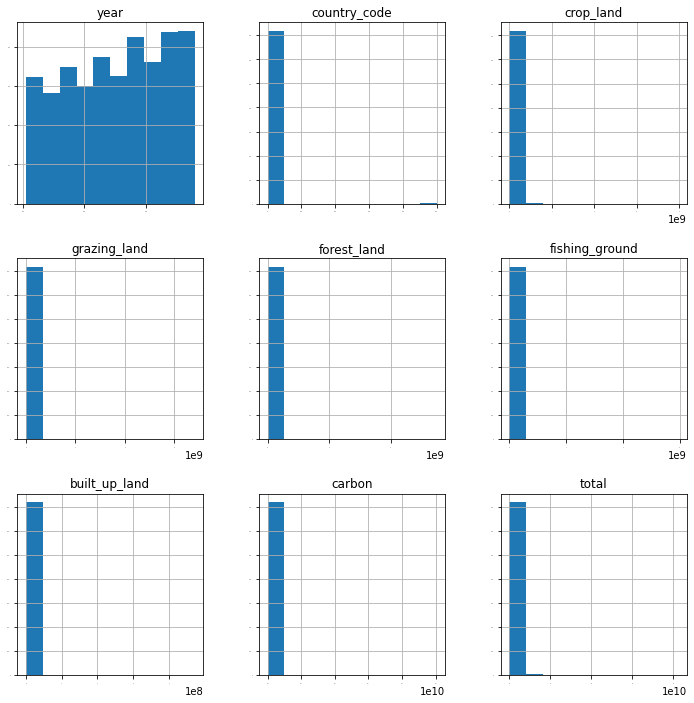

In [20]:
# to plot histograms (to check distribution of variables) of all the variables in a dataframe
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize =(12,12))
plt.show()

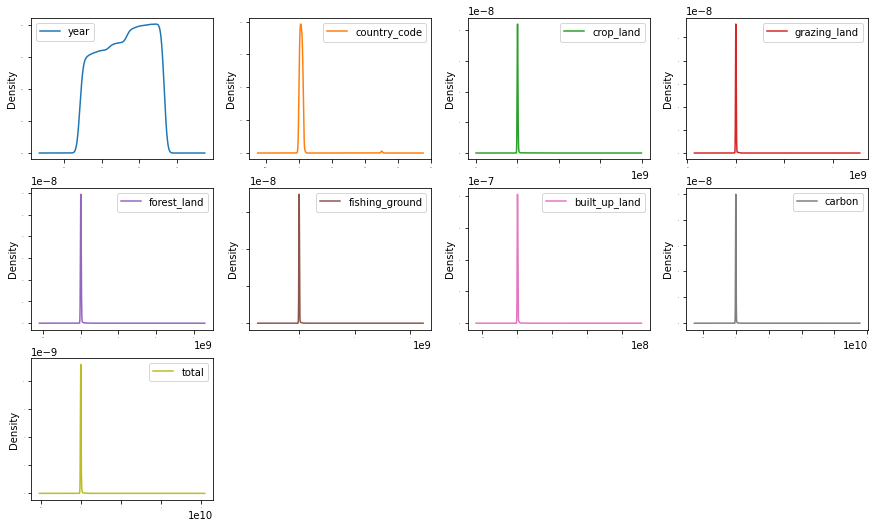

In [21]:
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(15,12))
plt.show()

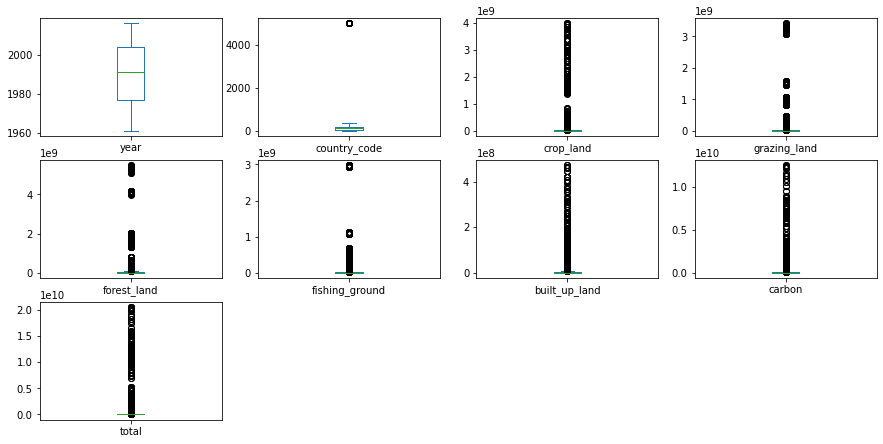

In [22]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
        fontsize=10, figsize = (15, 10))
plt.show() 

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72177 entries, 0 to 72185
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         72177 non-null  object 
 1   year            72177 non-null  int64  
 2   country_code    72177 non-null  int64  
 3   record          72177 non-null  object 
 4   crop_land       72177 non-null  float64
 5   grazing_land    72177 non-null  float64
 6   forest_land     72177 non-null  float64
 7   fishing_ground  72177 non-null  float64
 8   built_up_land   72177 non-null  float64
 9   carbon          72177 non-null  float64
 10  total           72177 non-null  float64
 11  QScore          72177 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 7.2+ MB


In [420]:
df1=df.drop(columns=['country','record','QScore'],axis=1)

In [421]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72177 entries, 0 to 72185
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            72177 non-null  int64  
 1   country_code    72177 non-null  int64  
 2   crop_land       72177 non-null  float64
 3   grazing_land    72177 non-null  float64
 4   forest_land     72177 non-null  float64
 5   fishing_ground  72177 non-null  float64
 6   built_up_land   72177 non-null  float64
 7   carbon          72177 non-null  float64
 8   total           72177 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 5.5 MB


In [25]:
from sklearn.neighbors import LocalOutlierFactor

In [31]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(df1)
# select all rows that are not outliers

In [36]:
mask1 = yhat != -1
mask22 = yhat == -1
print((yhat == -1).sum())
print((mask1).sum())
print((mask22).sum())

2355
69822
2355


In [45]:
df1.shape

(72177, 9)

In [41]:
df_fin = df1[mask1]

In [56]:
# calculate interquartile range
q25, q75 = np.percentile(df1.crop_land, 25), np.percentile(df1.crop_land, 75)
iqr = q75 - q25

In [57]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

In [96]:
cut_off, lower, upper

(28812129.813386455, -28812129.312542032, 48020216.85648851)

In [59]:
df_final=df1[(df1.crop_land > lower)&(df1.crop_land < upper)]

In [422]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.95]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)

capping the  country
capping the  year
capping the  country_code
capping the  record
capping the  crop_land
capping the  grazing_land
capping the  forest_land
capping the  fishing_ground
capping the  built_up_land
capping the  carbon
capping the  total
capping the  QScore


C:\Users\mahesh\AppData\Local\Temp/ipykernel_14072/2430433050.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col]
C:\Users\mahesh\AppData\Local\Temp/ipykernel_14072/2430433050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
C:\Users\mahesh\anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

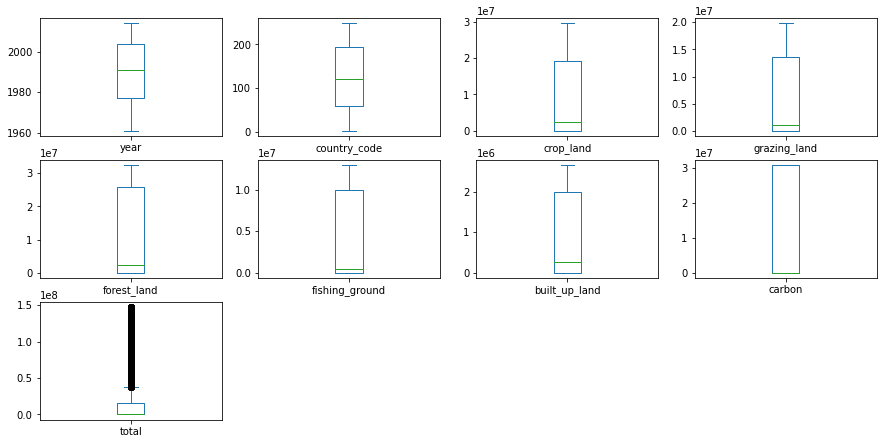

In [423]:
final_df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,
        fontsize=10, figsize = (15, 10))
plt.show() 

In [424]:
final_df.skew()

C:\Users\mahesh\AppData\Local\Temp/ipykernel_14072/1869444327.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  final_df.skew()


year             -0.160462
country_code      0.043340
crop_land         0.638198
grazing_land      0.598982
forest_land       0.516307
fishing_ground    0.535860
built_up_land     0.503682
carbon            0.652286
total             2.471178
dtype: float64

In [425]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72177 entries, 0 to 72185
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         72177 non-null  object 
 1   year            72177 non-null  int64  
 2   country_code    72177 non-null  int64  
 3   record          72177 non-null  object 
 4   crop_land       72177 non-null  float64
 5   grazing_land    72177 non-null  float64
 6   forest_land     72177 non-null  float64
 7   fishing_ground  72177 non-null  float64
 8   built_up_land   72177 non-null  float64
 9   carbon          72177 non-null  float64
 10  total           72177 non-null  float64
 11  QScore          72177 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 7.2+ MB


In [426]:
final_df.QScore.value_counts()

3A    51473
2A    10576
2B    10096
1A       16
1B       16
Name: QScore, dtype: int64

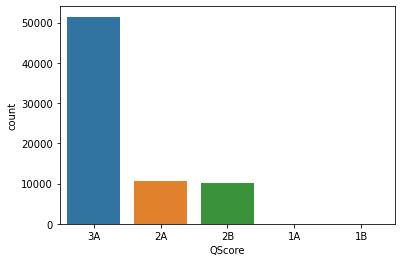

In [199]:
sns.countplot(x = 'QScore', data = final_df)
plt.show()

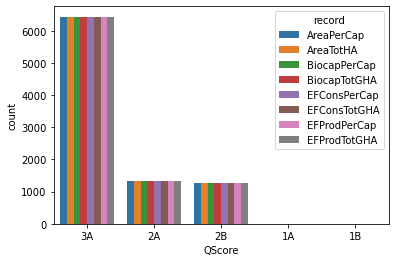

In [115]:
sns.countplot(x = 'QScore', hue = 'record', data = final_df)
plt.show()

### both category features considered for building model

In [403]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72177 entries, 0 to 72185
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         72177 non-null  object 
 1   year            72177 non-null  int64  
 2   country_code    72177 non-null  int64  
 3   record          72177 non-null  object 
 4   crop_land       72177 non-null  float64
 5   grazing_land    72177 non-null  float64
 6   forest_land     72177 non-null  float64
 7   fishing_ground  72177 non-null  float64
 8   built_up_land   72177 non-null  float64
 9   carbon          72177 non-null  float64
 10  total           72177 non-null  float64
 11  QScore          72177 non-null  int32  
dtypes: float64(7), int32(1), int64(2), object(2)
memory usage: 8.9+ MB


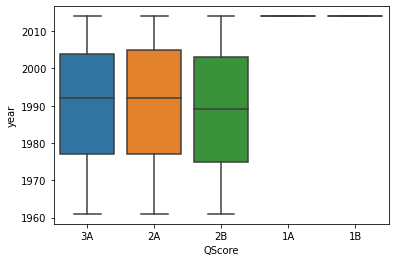

In [117]:
sns.boxplot( x = final_df.QScore, y = final_df.year)
plt.show()

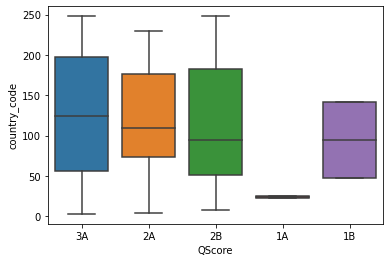

In [118]:
sns.boxplot( x = final_df.QScore, y = final_df.country_code)
plt.show()

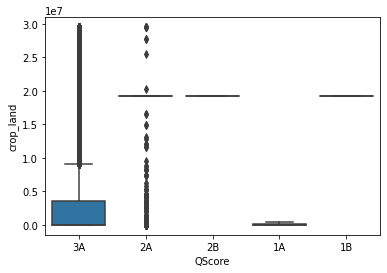

In [119]:
sns.boxplot( x = final_df.QScore, y = final_df.crop_land)
plt.show()

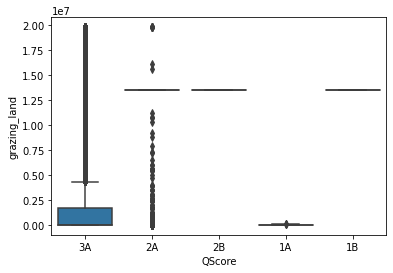

In [120]:
sns.boxplot( x = final_df.QScore, y = final_df.grazing_land)
plt.show()

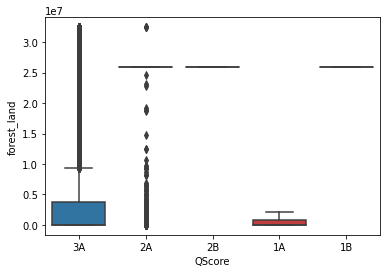

In [121]:
sns.boxplot( x = final_df.QScore, y = final_df.forest_land)
plt.show()

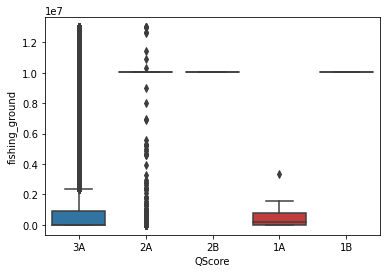

In [122]:
sns.boxplot( x = final_df.QScore, y = final_df.fishing_ground)
plt.show()

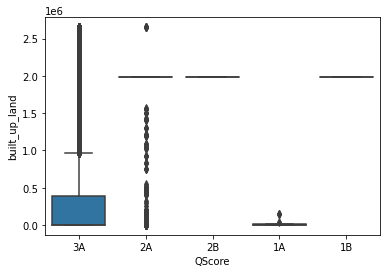

In [123]:
sns.boxplot( x = final_df.QScore, y = final_df.built_up_land)
plt.show()

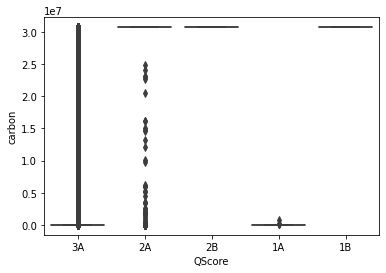

In [124]:
sns.boxplot( x = final_df.QScore, y = final_df.carbon)
plt.show()

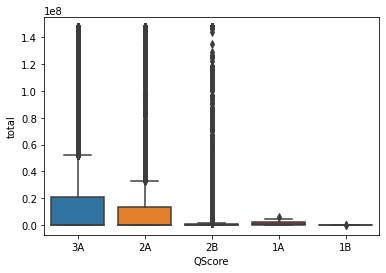

In [125]:
sns.boxplot( x = final_df.QScore, y = final_df.total)
plt.show()

In [427]:
final_df.dtypes

country            object
year                int64
country_code        int64
record             object
crop_land         float64
grazing_land      float64
forest_land       float64
fishing_ground    float64
built_up_land     float64
carbon            float64
total             float64
QScore             object
dtype: object

In [127]:
from sklearn.preprocessing import LabelEncoder

In [428]:
le = LabelEncoder()

In [429]:
le = LabelEncoder()
final_df['QScore'] = le.fit_transform(final_df.QScore)

C:\Users\mahesh\AppData\Local\Temp/ipykernel_14072/2853148870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['QScore'] = le.fit_transform(final_df.QScore)


In [430]:
final_df.dtypes

country            object
year                int64
country_code        int64
record             object
crop_land         float64
grazing_land      float64
forest_land       float64
fishing_ground    float64
built_up_land     float64
carbon            float64
total             float64
QScore              int32
dtype: object

In [431]:
countryen = pd.get_dummies(final_df.country, drop_first = True)
recorden = pd.get_dummies(final_df.record, drop_first = True)

final_df1 = pd.concat([final_df, countryen, recorden], axis = 1)
final_df1.head(10)

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,...,Yugoslav SFR,Zambia,Zimbabwe,AreaTotHA,BiocapPerCap,BiocapTotGHA,EFConsPerCap,EFConsTotGHA,EFProdPerCap,EFProdTotGHA
0,Armenia,1992,3,AreaPerCap,1.402924e-01,0.199546,0.097188,0.036888,0.029320,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0
1,Armenia,1992,3,AreaTotHA,4.830000e+05,687000.000000,334600.000000,127000.000000,100943.000800,0.000000e+00,...,0,0,0,1,0,0,0,0,0,0
2,Armenia,1992,3,BiocapPerCap,1.598044e-01,0.135261,0.084003,0.013742,0.033398,0.000000e+00,...,0,0,0,0,1,0,0,0,0,0
3,Armenia,1992,3,BiocapTotGHA,5.501762e+05,465677.972200,289207.107800,47311.551720,114982.279300,0.000000e+00,...,0,0,0,0,0,1,0,0,0,0
4,Armenia,1992,3,EFConsPerCap,3.875102e-01,0.189462,0.003428,0.004165,0.033398,1.114093e+00,...,0,0,0,0,0,0,1,0,0,0
5,Armenia,1992,3,EFConsTotGHA,1.334124e+06,652282.314700,4.328087,14338.728980,114982.279300,3.835610e+06,...,0,0,0,0,0,0,0,1,0,0
6,Armenia,1992,3,EFProdPerCap,1.598044e-01,0.135261,0.003428,0.001266,0.033398,1.074631e+00,...,0,0,0,0,0,0,0,0,1,0
7,Armenia,1992,3,EFProdTotGHA,5.501762e+05,465677.972200,0.003428,4358.142036,114982.279300,3.699750e+06,...,0,0,0,0,0,0,0,0,0,1
8,Armenia,1993,3,AreaPerCap,1.465909e-01,0.204573,0.099432,0.037763,0.029320,0.000000e+00,...,0,0,0,0,0,0,0,0,0,0
9,Armenia,1993,3,AreaTotHA,4.930000e+05,688000.000000,334400.000000,127000.000000,98605.697630,0.000000e+00,...,0,0,0,1,0,0,0,0,0,0


In [432]:
final_df1 = final_df1.drop(['country', 'record'], axis = 1)
final_df1.head()

,year,country_code,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore,...,Yugoslav SFR,Zambia,Zimbabwe,AreaTotHA,BiocapPerCap,BiocapTotGHA,EFConsPerCap,EFConsTotGHA,EFProdPerCap,EFProdTotGHA
0,1992,3,0.140292,0.199546,0.097188,0.036888,0.029320,0.000000,5.032351e-01,4,...,0,0,0,0,0,0,0,0,0,0
1,1992,3,483000.000000,687000.000000,334600.000000,127000.000000,100943.000800,0.000000,1.732543e+06,4,...,0,0,0,1,0,0,0,0,0,0
2,1992,3,0.159804,0.135261,0.084003,0.013742,0.033398,0.000000,4.262086e-01,4,...,0,0,0,0,1,0,0,0,0,0
3,1992,3,550176.242700,465677.972200,289207.107800,47311.551720,114982.279300,0.000000,1.467355e+06,4,...,0,0,0,0,0,1,0,0,0,0
4,1992,3,0.387510,0.189462,0.003428,0.004165,0.033398,1.114093,1.728629e+00,4,...,0,0,0,0,0,0,1,0,0,0


### our class is imbalnced we can see stable ratio is 36:64, we will use SMOTE to handle imbalanced data.

In [433]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72177 entries, 0 to 72185
Columns: 209 entries, year to EFProdTotGHA
dtypes: float64(7), int32(1), int64(2), uint8(199)
memory usage: 19.5 MB


In [434]:
final_df1

,year,country_code,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore,...,Yugoslav SFR,Zambia,Zimbabwe,AreaTotHA,BiocapPerCap,BiocapTotGHA,EFConsPerCap,EFConsTotGHA,EFProdPerCap,EFProdTotGHA
0,1992,3,1.402924e-01,1.995463e-01,9.718805e-02,3.688847e-02,2.931995e-02,0.000000e+00,5.032351e-01,4,...,0,0,0,0,0,0,0,0,0,0
1,1992,3,4.830000e+05,6.870000e+05,3.346000e+05,1.270000e+05,1.009430e+05,0.000000e+00,1.732543e+06,4,...,0,0,0,1,0,0,0,0,0,0
2,1992,3,1.598044e-01,1.352610e-01,8.400321e-02,1.374213e-02,3.339780e-02,0.000000e+00,4.262086e-01,4,...,0,0,0,0,1,0,0,0,0,0
3,1992,3,5.501762e+05,4.656780e+05,2.892071e+05,4.731155e+04,1.149823e+05,0.000000e+00,1.467355e+06,4,...,0,0,0,0,0,1,0,0,0,0
4,1992,3,3.875102e-01,1.894622e-01,3.428175e-03,4.164833e-03,3.339780e-02,1.114093e+00,1.728629e+00,4,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72181,2014,248,2.949474e+07,1.980234e+07,3.244672e+07,1.298890e+07,2.653022e+06,0.000000e+00,1.475309e+08,4,...,0,0,0,0,0,1,0,0,0,0
72182,2014,248,5.336445e-01,1.402092e-01,2.734954e-01,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,4,...,0,0,0,0,0,0,1,0,0,0
72183,2014,248,2.949474e+07,1.980234e+07,3.244672e+07,1.298890e+07,2.653022e+06,3.072609e+07,1.475309e+08,4,...,0,0,0,0,0,0,0,1,0,0
72184,2014,248,5.336445e-01,1.402092e-01,2.734954e-01,8.974253e-02,6.329435e-02,1.646235e+00,2.746619e+00,4,...,0,0,0,0,0,0,0,0,1,0


In [207]:
final_df1.skew()

year           -0.160462
country_code    0.043340
crop_land       0.638198
grazing_land    0.598982
forest_land     0.516307
                  ...   
BiocapTotGHA    2.267475
EFConsPerCap    2.268049
EFConsTotGHA    2.267666
EFProdPerCap    2.268049
EFProdTotGHA    2.267666
Length: 209, dtype: float64

### tau1, tau3, tau4, p1 and g2 are negative / left skewed
### and rest all are positive / right skewed p2,p3 and p4 have negative values so we cant use log transform here

In [137]:
from scipy import stats
from scipy.special import boxcox, inv_boxcox
from scipy.stats import boxcox_llf, yeojohnson
from sklearn.preprocessing import PowerTransformer

In [139]:
final_df1.dtypes

year              int64
country_code      int64
crop_land       float64
grazing_land    float64
forest_land     float64
                 ...   
BiocapTotGHA      uint8
EFConsPerCap      uint8
EFConsTotGHA      uint8
EFProdPerCap      uint8
EFProdTotGHA      uint8
Length: 209, dtype: object

In [208]:
dftf = final_df1.drop('QScore',axis=1)

In [209]:
from sklearn.preprocessing import StandardScaler # importing StandardScaler method

In [210]:
scaler = StandardScaler() # Creating an object for method StandardScaler()

In [211]:
dftf[dftf.columns] = scaler.fit_transform(dftf) # Fitting and transforming data using scaler

In [212]:
dftf['QScore'] = final_df1['QScore']

C:\Users\mahesh\AppData\Local\Temp/ipykernel_14072/144901855.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  dftf['QScore'] = final_df1['QScore']


In [213]:
dftf

,year,country_code,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Albania,...,Zambia,Zimbabwe,AreaTotHA,BiocapPerCap,BiocapTotGHA,EFConsPerCap,EFConsTotGHA,EFProdPerCap,EFProdTotGHA,QScore
0,0.113097,-1.649500,-0.866690,-0.850509,-0.864190,-0.843994,-0.891482,-0.752178,-0.490817,-0.07903,...,-0.076871,-0.07903,-0.377985,-0.377938,-0.378009,-0.377938,-0.377985,-0.377938,-0.377985,4
1,0.113097,-1.649500,-0.817360,-0.749879,-0.837265,-0.817981,-0.786536,-0.752178,-0.444784,-0.07903,...,-0.076871,-0.07903,2.645605,-0.377938,-0.378009,-0.377938,-0.377985,-0.377938,-0.377985,4
2,0.113097,-1.649500,-0.866690,-0.850509,-0.864190,-0.843994,-0.891482,-0.752178,-0.490817,-0.07903,...,-0.076871,-0.07903,-0.377985,2.645940,-0.378009,-0.377938,-0.377985,-0.377938,-0.377985,4
3,0.113097,-1.649500,-0.810499,-0.782298,-0.840917,-0.834303,-0.771939,-0.752178,-0.451830,-0.07903,...,-0.076871,-0.07903,-0.377985,-0.377938,2.645437,-0.377938,-0.377985,-0.377938,-0.377985,4
4,0.113097,-1.649500,-0.866690,-0.850509,-0.864190,-0.843994,-0.891482,-0.752178,-0.490817,-0.07903,...,-0.076871,-0.07903,-0.377985,-0.377938,-0.378009,2.645940,-0.377985,-0.377938,-0.377985,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72181,1.494719,1.656178,2.145688,2.050097,1.746795,1.816549,1.866771,-0.752178,3.428966,-0.07903,...,-0.076871,-0.07903,-0.377985,-0.377938,2.645437,-0.377938,-0.377985,-0.377938,-0.377985,4
72182,1.494719,1.656178,-0.866690,-0.850509,-0.864190,-0.843994,-0.891482,-0.752178,-0.490816,-0.07903,...,-0.076871,-0.07903,-0.377985,-0.377938,-0.378009,2.645940,-0.377985,-0.377938,-0.377985,4
72183,1.494719,1.656178,2.145688,2.050097,1.746795,1.816549,1.866771,1.402933,3.428966,-0.07903,...,-0.076871,-0.07903,-0.377985,-0.377938,-0.378009,-0.377938,2.645605,-0.377938,-0.377985,4
72184,1.494719,1.656178,-0.866690,-0.850509,-0.864190,-0.843994,-0.891482,-0.752178,-0.490816,-0.07903,...,-0.076871,-0.07903,-0.377985,-0.377938,-0.378009,-0.377938,-0.377985,2.645940,-0.377985,4


In [214]:
dftf.skew()

year           -0.160462
country_code    0.043340
crop_land       0.638198
grazing_land    0.598982
forest_land     0.516307
                  ...   
EFConsPerCap    2.268049
EFConsTotGHA    2.267666
EFProdPerCap    2.268049
EFProdTotGHA    2.267666
QScore         -1.357499
Length: 209, dtype: float64

In [232]:

# transform training data & save lambda value
for i in dftf.columns:
    dftf[i],fitted_lambda = stats.yeojohnson(df_tf[i])

# use lambda value to transform test data
#test_data = stats.boxcox(test1, fitted_lambda)

# (optional) plot train & test
#fig, ax=plt.subplots(1,2)
#sns.distplot(train_data, ax=ax[0])
#sns.distplot(test_data, ax=ax[1])

In [233]:
dftf.skew()

0     -0.026797
1     -0.045066
2      0.623969
3      0.651391
4      0.654024
         ...   
204    2.267475
205    2.268049
206    2.267666
207    2.268049
208    2.267666
Length: 209, dtype: float64

In [234]:
df_tf.skew()

0     -0.026797
1     -0.045066
2      0.623969
3      0.651391
4      0.654024
         ...   
204    2.267475
205    2.268049
206    2.267666
207    2.268049
208    2.267666
Length: 209, dtype: float64

In [215]:
dftf.columns

Index(['year', 'country_code', 'crop_land', 'grazing_land', 'forest_land',
       'fishing_ground', 'built_up_land', 'carbon', 'total', 'Albania',
       ...
       'Zambia', 'Zimbabwe', 'AreaTotHA', 'BiocapPerCap', 'BiocapTotGHA',
       'EFConsPerCap', 'EFConsTotGHA', 'EFProdPerCap', 'EFProdTotGHA',
       'QScore'],
      dtype='object', length=209)

In [164]:
#dftf['country','record','QScore'] = df1['country','record','QScore']
dffrmodel = pd.concat([dftf, df1[['country','record','QScore']]], axis=1)

In [238]:
dftf

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,0.109386,-0.597967,-0.217682,-0.199258,-0.204457,-0.176300,-0.218842,-0.152026,-0.241027,1.10385,...,-2.822643,-1.654913,-1.58343,-0.981894,-0.981835,-0.981924,-0.981835,-0.981894,-0.981835,-0.981894
1,0.109386,-0.597967,-0.209613,-0.184506,-0.200544,-0.173006,-0.202623,-0.152026,-0.231072,1.10385,...,-2.822643,-1.654913,-1.58343,0.246396,-0.981835,-0.981924,-0.981835,-0.981894,-0.981835,-0.981894
2,0.109386,-0.597967,-0.217682,-0.199258,-0.204457,-0.176300,-0.218842,-0.152026,-0.241027,1.10385,...,-2.822643,-1.654913,-1.58343,-0.981894,0.246344,-0.981924,-0.981835,-0.981894,-0.981835,-0.981894
3,0.109386,-0.597967,-0.208504,-0.189191,-0.201072,-0.175069,-0.200421,-0.152026,-0.232576,1.10385,...,-2.822643,-1.654913,-1.58343,-0.981894,-0.981835,0.246421,-0.981835,-0.981894,-0.981835,-0.981894
4,0.109386,-0.597967,-0.217682,-0.199258,-0.204457,-0.176300,-0.218842,-0.152026,-0.241027,1.10385,...,-2.822643,-1.654913,-1.58343,-0.981894,-0.981835,-0.981924,0.246344,-0.981894,-0.981835,-0.981894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72172,1.735993,0.789894,0.167750,0.153243,0.154577,0.136043,0.169487,-0.152026,0.072514,1.10385,...,-2.822643,-1.654913,-1.58343,-0.981894,-0.981835,0.246421,-0.981835,-0.981894,-0.981835,-0.981894
72173,1.735993,0.789894,-0.217682,-0.199258,-0.204457,-0.176300,-0.218842,-0.152026,-0.241027,1.10385,...,-2.822643,-1.654913,-1.58343,-0.981894,-0.981835,-0.981924,0.246344,-0.981894,-0.981835,-0.981894
72174,1.735993,0.789894,0.167750,0.153243,0.154577,0.136043,0.169487,0.102084,0.072514,1.10385,...,-2.822643,-1.654913,-1.58343,-0.981894,-0.981835,-0.981924,-0.981835,0.246396,-0.981835,-0.981894
72175,1.735993,0.789894,-0.217682,-0.199258,-0.204457,-0.176300,-0.218842,-0.152026,-0.241027,1.10385,...,-2.822643,-1.654913,-1.58343,-0.981894,-0.981835,-0.981924,-0.981835,-0.981894,0.246344,-0.981894


In [237]:
dftf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72177 entries, 0 to 72176
Columns: 209 entries, 0 to 208
dtypes: float64(209)
memory usage: 115.1 MB


In [378]:
X = dftf.drop('QScore',axis=1)
y = dftf['QScore']
seed = 1
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed, stratify = y)

In [379]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50523, 208), (21654, 208), (50523,), (21654,))

In [234]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

In [239]:
sampling = SMOTE(sampling_strategy = 'auto')

In [240]:
X_res, y_res = sampling.fit_resample(X_train, y_train)

In [241]:
X_res.shape, y_res.shape

((180155, 208), (180155,))

In [242]:
from collections import Counter

In [243]:
Counter(y_res)

Counter({4: 36031, 2: 36031, 3: 36031, 0: 36031, 1: 36031})

In [246]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [252]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [253]:
uni = SelectKBest(score_func = f_classif, k = 10)
fit = uni.fit(X_res, y_res)

In [262]:
X_res.columns[fit.get_support(indices=True)]

Index(['year', 'crop_land', 'grazing_land', 'forest_land', 'fishing_ground',
       'built_up_land', 'carbon', 'Belize', 'Cook Islands', 'Montserrat'],
      dtype='object')

In [279]:
col1=['year', 'crop_land', 'grazing_land', 'forest_land', 'fishing_ground',
       'built_up_land', 'carbon', 'Belize', 'Cook Islands', 'Montserrat']

X1=X_res[col1]
y1=y_res

X_test1=X_test[col1]

In [256]:
from sklearn.decomposition import PCA

In [264]:
model=PCA(n_components=10).fit(X_res)
n_pcs = model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
dftf.columns[most_important]

Index(['Belize', 'Montserrat', 'Cook Islands', 'Solomon Islands', 'carbon',
       'country_code', 'Georgia', 'Aruba', 'Honduras', 'New Zealand'],
      dtype='object')

In [280]:
col2=['Belize', 'Montserrat', 'Cook Islands', 'Solomon Islands', 'carbon',
       'country_code', 'Georgia', 'Aruba', 'Honduras', 'New Zealand']

X2=X_res[col2]
y2=y_res

X_test2=X_test[col2]

In [265]:
import statsmodels.api as sm
X_new = sm.add_constant(X_res)
model = sm.OLS(y_res, X_new).fit()
model.pvalues

C:\Users\mahesh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const           0.0
year            1.0
country_code    1.0
crop_land       1.0
grazing_land    1.0
               ... 
BiocapTotGHA    1.0
EFConsPerCap    1.0
EFConsTotGHA    1.0
EFProdPerCap    1.0
EFProdTotGHA    1.0
Length: 209, dtype: float64

In [266]:
selected_features = list(X_res.columns)
pmax = 1
while (len(selected_features)>0):
    p= []
    X_new = X_res[selected_features]
    X_new = sm.add_constant(X_new)
    model = sm.OLS(y_res,X_new).fit()
    p = pd.Series(model.pvalues.values[1:],index = selected_features)      
    pmax = max(p)
    feature_pmax = p.idxmax()
    if(pmax>0.05):
        selected_features.remove(feature_pmax)
    else:
        break
selected_features

C:\Users\mahesh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\mahesh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\mahesh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\mahesh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\mahesh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureW

['country_code',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo, Democratic Republic of',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Czechoslovakia',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Ethiopia PDR',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 '

In [343]:
print(len(selected_features))

190


In [282]:
col3=['country_code', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Congo, Democratic Republic of', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Czechoslovakia', "Côte d'Ivoire", 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Ethiopia PDR', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libyan Arab Jamahiriya', 'Lithuania', 'Luxembourg', 'Macedonia TFYR', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta', 'Martinique', 'Mauritania', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russian Federation', 'Rwanda', 'Réunion', 'Saint Lucia', 'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Serbia and Montenegro', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Sudan (former)', 'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'USSR', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States of America', 'Uruguay', 'Uzbekistan', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'World', 'Yemen', 'Zambia', 'Zimbabwe']

X3=X_res[col3]
y3=y_res

X_test3=X_test[col3]

In [380]:
model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs',penalty='l2')
model1.fit(X1,y1)

C:\Users\mahesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [381]:
pred1 = model1.predict(X_test1)
pred_prob1 = model1.predict_proba(X_test1)

In [382]:
print('classes: ',model1.classes_)
print('coefficients: ',model1.coef_)
print('intercept :',model1.intercept_)

classes:  [0 1 2 3 4]
coefficients:  [[16.08208043 -0.14717973 -6.3591518  -3.96982557 -0.0186054   1.81159466
  -8.59086253  2.32139414  0.11934394  0.06837863]
 [-1.92725193 -0.78008101 -1.09576568 -1.25486785 -1.36939633 -1.09968883
  -1.91099475 -0.10352109  0.55012188  0.75348047]
 [-4.52655269  2.59148303  1.89974355 -0.11662393 -0.82518927 -0.29996897
   0.79322313 -0.39079302 -0.2951277  -0.34609301]
 [-4.62677848 -7.5705432   4.36343558  7.03778599  4.46543102 -0.36671871
  13.26563745 -0.14239208 -0.05028898 -0.10075164]
 [-5.00149733  5.90632091  1.19173835 -1.69646864 -2.25224001 -0.04521815
  -3.5570033  -1.68468795 -0.32404915 -0.37501446]]
intercept : [-22.57848703 -11.6155364   18.41179236  -5.81629465  21.59852573]


In [383]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report

In [384]:
labels = [4,3,2,1,0]
con_mat1 = confusion_matrix(y_test, pred1, labels = labels )
print(con_mat1)

[[14166    22   693     0   561]
 [    0  1977  1052     0     0]
 [   21  1898  1207     0    47]
 [    0     0     0     5     0]
 [    0     0     0     0     5]]


In [385]:
print("Model Score = ",model1.score(X_test1, y_test))
np.mean(y_test == pred1)

Model Score =  0.8016994550660386


0.8016994550660386

In [386]:
dftf.QScore.value_counts()

4    51473
2    10576
3    10096
0       16
1       16
Name: QScore, dtype: int64

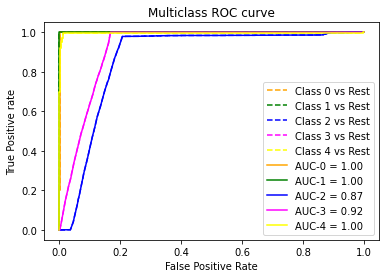

In [387]:

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob1[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')
plt.plot(fpr[0], tpr[0], 'orange', label = 'AUC-0 = %0.2f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], 'green', label = 'AUC-1 = %0.2f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], 'blue', label = 'AUC-2 = %0.2f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], 'magenta', label = 'AUC-3 = %0.2f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], 'yellow', label = 'AUC-4 = %0.2f' % roc_auc[4])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [388]:
print ('Report : ')
print (classification_report(y_test, pred1))

Report : 
              precision    recall  f1-score   support

           0       0.01      1.00      0.02         5
           1       1.00      1.00      1.00         5
           2       0.41      0.38      0.39      3173
           3       0.51      0.65      0.57      3029
           4       1.00      0.92      0.96     15442

    accuracy                           0.80     21654
   macro avg       0.58      0.79      0.59     21654
weighted avg       0.84      0.80      0.82     21654



In [331]:
model2 = LogisticRegression(multi_class='multinomial', solver='lbfgs',penalty='l2')
model2.fit(X2,y2)

C:\Users\mahesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [332]:
pred2 = model2.predict(X_test2)
pred_prob2 = model2.predict_proba(X_test2)

In [333]:
labels = [4,3,2,1,0]
con_mat2 = confusion_matrix(y_test, pred2, labels = labels )
print(con_mat2)

[[14277   173   992     0     0]
 [    0  1468  1561     0     0]
 [   64   503  2606     0     0]
 [    0     0     0     5     0]
 [    0     0     0     0     5]]


In [334]:
print("Model Score = ",model2.score(X_test2, y_test))
np.mean(y_test == pred2)

Model Score =  0.8479264800960562


0.8479264800960562

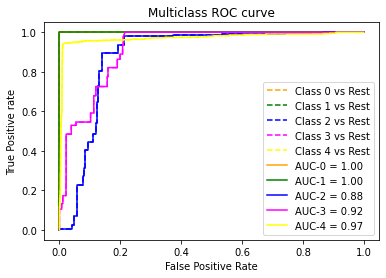

In [335]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob2[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')
plt.plot(fpr[0], tpr[0], 'orange', label = 'AUC-0 = %0.2f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], 'green', label = 'AUC-1 = %0.2f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], 'blue', label = 'AUC-2 = %0.2f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], 'magenta', label = 'AUC-3 = %0.2f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], 'yellow', label = 'AUC-4 = %0.2f' % roc_auc[4])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [336]:
print ('Report : ')
print (classification_report(y_test, pred2))

Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       0.51      0.82      0.63      3173
           3       0.68      0.48      0.57      3029
           4       1.00      0.92      0.96     15442

    accuracy                           0.85     21654
   macro avg       0.84      0.85      0.83     21654
weighted avg       0.88      0.85      0.86     21654



In [337]:
model3 = LogisticRegression(multi_class='multinomial', solver='lbfgs',penalty='l2')
model3.fit(X3,y3)

LogisticRegression(multi_class='multinomial')

In [374]:
pred3 = model3.predict(X_test3)
pred_prob3 = model3.predict_proba(X_test3)

In [339]:
labels = [4,3,2,1,0]
con_mat3 = confusion_matrix(y_test, pred3, labels = labels )
print(con_mat3)

[[15442     0     0     0     0]
 [    0  3029     0     0     0]
 [    0     0  3173     0     0]
 [    0     0     0     5     0]
 [    0     0     0     0     5]]


In [340]:
print("Model Score = ",model3.score(X_test3, y_test))
np.mean(y_test == pred3)

Model Score =  1.0


1.0

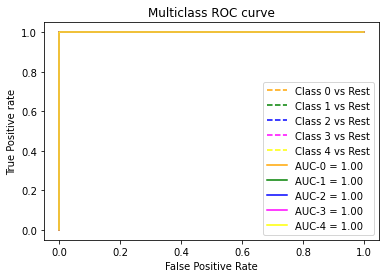

In [341]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}

n_class = 5

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob3[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='magenta', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')
plt.plot(fpr[0], tpr[0], 'orange', label = 'AUC-0 = %0.2f' % roc_auc[0])
plt.plot(fpr[1], tpr[1], 'green', label = 'AUC-1 = %0.2f' % roc_auc[1])
plt.plot(fpr[2], tpr[2], 'blue', label = 'AUC-2 = %0.2f' % roc_auc[2])
plt.plot(fpr[3], tpr[3], 'magenta', label = 'AUC-3 = %0.2f' % roc_auc[3])
plt.plot(fpr[4], tpr[4], 'yellow', label = 'AUC-4 = %0.2f' % roc_auc[4])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [342]:
print ('Report : ')
print (classification_report(y_test, pred3))

Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00      3173
           3       1.00      1.00      1.00      3029
           4       1.00      1.00      1.00     15442

    accuracy                           1.00     21654
   macro avg       1.00      1.00      1.00     21654
weighted avg       1.00      1.00      1.00     21654



In [435]:
output = pd.DataFrame(y_test)
output

,QScore
20449,2
12658,4
20208,2
4759,4
39974,3
...,...
43392,4
50913,2
26970,3
22726,4


In [436]:
output['Predicted'] = le.inverse_transform(pred3)
output

,QScore,Predicted
20449,2,2A
12658,4,3A
20208,2,2A
4759,4,3A
39974,3,2B
...,...,...
43392,4,3A
50913,2,2A
26970,3,2B
22726,4,3A


### RandomForest

In [440]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X3, y3)

rfc_pred = rfc.predict(X_test3)

print(classification_report(y_test, rfc_pred))

labels = [4,3,2,1,0]

print(confusion_matrix(y_test, rfc_pred,labels = labels))

print(classification_report(y_test, rfc_pred,output_dict=True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00      3173
           3       1.00      1.00      1.00      3029
           4       1.00      1.00      1.00     15442

    accuracy                           1.00     21654
   macro avg       1.00      1.00      1.00     21654
weighted avg       1.00      1.00      1.00     21654

[[15442     0     0     0     0]
 [    0  3029     0     0     0]
 [    0     0  3173     0     0]
 [    0     0     0     5     0]
 [    0     0     0     0     5]]
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3173}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3029}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0

### KNN

In [441]:
from sklearn.neighbors import KNeighborsClassifier

In [442]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score

In [444]:
knn_model = KNeighborsClassifier()
knn_model.fit(X3,y3)

knn_pred = knn_model.predict(X_test3)
labels = [4,3,2,1,0]
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred,labels = labels))
print(classification_report(y_test, knn_pred,output_dict=True))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00      3173
           3       1.00      1.00      1.00      3029
           4       1.00      1.00      1.00     15442

    accuracy                           1.00     21654
   macro avg       1.00      1.00      1.00     21654
weighted avg       1.00      1.00      1.00     21654

[[15442     0     0     0     0]
 [    0  3029     0     0     0]
 [    0     0  3173     0     0]
 [    0     0     0     5     0]
 [    0     0     0     0     5]]
{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3173}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3029}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0

In [445]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [448]:
model = XGBClassifier()
eval_set = [(X3, y3), (X_test3, y_test)]
model.fit(X3, y3,  eval_set=eval_set, verbose=1)
# make predictions for test data
predictions = model.predict(X_test3)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[14:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-mlogloss:1.16981	validation_1-mlogloss:1.32746
[1]	validation_0-mlogloss:0.94215	validation_1-mlogloss:1.15430
[2]	validation_0-mlogloss:0.78326	validation_1-mlogloss:1.01826
[3]	validation_0-mlogloss:0.67377	validation_1-mlogloss:0.93038
[4]	validation_0-mlogloss:0.58849	validation_1-mlogloss:0.84573
[5]	validation_0-mlogloss:0.52510	validation_1-mlogloss:0.78862
[6]	validation_0-mlogloss:0.47277	validation_1-mlogloss:0.73388
[7]	validation_0-mlogloss:0.42281	validation_1-mlogloss:0.67010
[8]	validation_0-mlogloss:0.38228	validation_1-mlogloss:0.61746
[9]	validation_0-mlogloss:0.34075	validation_1-mlogloss:0.56381
[10]	validation_0-mlogloss:0.31659	validation_1-m